# Exploratory Data Analysis 11.12.2023

## Imports

In [143]:
import numpy as np
import pandas as pd
import plotnine as p9
from plotnine import *
from datetime import *
from textblob import TextBlob

## Loading Datasets

We will only search through 2 data sources, as the rest of news sources, generated far less observations, and our scrapper provided poor quality output which is hard to interprete. We will try to fix it eventually

In [16]:
rates = pd.read_csv('crypto_rates.csv/part-00000-4cc50166-067e-41a2-b821-3d91ba593824-c000.csv', sep=',')
rates.head()

,id,symbol,currencySymbol,type,rateUsd,timestamp
0,icelandic-króna,ISK,kr,fiat,0.007092,1700654812789
1,saint-helena-pound,SHP,£,fiat,1.252842,1700654812789
2,multi-collateral-dai,DAI,NaN,crypto,1.000203,1700654812789
3,hungarian-forint,HUF,Ft,fiat,0.002864,1700654812789
4,colombian-peso,COP,$,fiat,0.000248,1700654812789


In [14]:
news_io = pd.read_csv('news_io.csv/part-00000-f624a656-5270-4e42-bd9a-74f3a5842d01-c000.csv', sep=';-;')
news_io.head()

C:\Users\Hubert\AppData\Local\Temp\ipykernel_33640\697804507.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  news_io = pd.read_csv('news_io.csv/part-00000-f624a656-5270-4e42-bd9a-74f3a5842d01-c000.csv', sep=';-;')


,article_id,title,link,keywords,creator,video_url,description,content,timestamp,image_url,source_id,source_priority,country,category,language
0,aff9633c7b572ed6a39f6e12f9f989d5,Exchange Analysts Reveal Four Sources of Bitco...,https://en.bitcoinsistemi.com/exchange-analyst...,"[Analysis, Bitcoin, News]",[Mete Demiralp],"""""",Analysts from cryptocurrency exchange Bitfinex...,Analysts from cryptocurrency exchange Bitfinex...,1701936425000,https://en.bitcoinsistemi.com/wp-content/uploa...,bitcoinsistemi,7453936,[turkey],[top],english
1,b40084ed2dadc26f1dc4aa35c4ee3bcd,"Cold Supply Faces Challenges In Cost, Temperat...",https://www.businessworld.in/article/Cold-Supp...,"""""","""""","""""",Industry experts discuss the current state of ...,"""Transporting or supplying food is not that di...",1701936317000,https://static.businessworld.in/article/articl...,businessworld,150658,[india],[top],english
2,fbfd495a6cea7b42a7e59d89dfd4e623,Fidel Castro's Sister Who Worked For The CIA D...,https://www.ibtimes.co.uk/fidel-castros-sister...,[World],"""""","""""",Juanita Castro lived in exile in Miami for dec...,"""INTERNATIONAL BUSINESS TIMES uk NOTICEBOARD M...",1701935869000,"""""",ibtimes,458722,[united kingdom],[top],english
3,11fa582ca8e21615c43a04d935a1afe1,"Following UK expansion, Robinhood brings crypt...",https://techcrunch.com/2023/12/07/robinhood-eu...,"[Crypto, crypto, Robinhood]",[Rita Liao],"""""",Robinhood’s long-awaited international expansi...,Robinhood’s long-awaited international expansi...,1701935747000,"""""",techcrunch,1756,[united states of america],[technology],english
4,c0ff0bdc7891d86c43bb7505ea256d5e,The Future of Trading Has Arrived: Say Hello t...,https://news.knowledia.com/GB/en/articles/the-...,"""""","""""","""""",Article posted at The Market Oracle http://www...,"""The Future of Trading Has Arrived: Say Hello ...",1701935660000,http://www.marketoracle.co.uk/images/marketora...,knowledia,167779,[united kingdom],[top],english


### Filtering only cryptocurrencies

In [18]:
crypto_rates = rates[rates['type'] == 'crypto'].reset_index(drop=True)
crypto_rates.head(10)

,id,symbol,currencySymbol,type,rateUsd,timestamp
0,multi-collateral-dai,DAI,NaN,crypto,1.000203,1700654812789
1,zcash,ZEC,NaN,crypto,27.918376,1700654812789
2,litecoin,LTC,NaN,crypto,67.689014,1700654812789
3,persistence,XPRT,NaN,crypto,0.269335,1700654812789
4,dash,DASH,NaN,crypto,28.306559,1700654812789
5,crypto-com-coin,CRO,NaN,crypto,0.093502,1700654812789
6,qtum,QTUM,NaN,crypto,3.011820,1700654812789
7,ethereum,ETH,NaN,crypto,2018.198777,1700654812789
8,sentinel,DVPN,NaN,crypto,0.000498,1700654812789
9,bitcoin,BTC,₿,crypto,36519.869375,1700654812789


# Cyptocurrencies rates analysis

## Missing data

In [19]:
crypto_rates.isnull().sum()

id                     0
symbol                 0
currencySymbol    231232
type                   0
rateUsd                0
timestamp              0
dtype: int64

## Available cryptocurrencies

In [20]:
crypto_rates['symbol'].unique()

array(['DAI', 'ZEC', 'LTC', 'XPRT', 'DASH', 'CRO', 'QTUM', 'ETH', 'DVPN',
       'BTC', 'USDT', 'BNB', 'WAVES', 'EOS', 'DOGE', 'RUNE', 'BCH'],
      dtype=object)

In [21]:
len(crypto_rates['symbol'].unique())

17

## Unique timestamps

In [22]:
len(crypto_rates['timestamp'].unique())

14452

## Timestamp-to-date

In [71]:
crypto_rates['date'] = crypto_rates['timestamp'].apply(lambda x: datetime.fromtimestamp(x//1000).strftime('%m-%d-%H'))
crypto_rates = crypto_rates[crypto_rates['timestamp'] > 1701500000000]
crypto_rates.head()

,id,symbol,currencySymbol,type,rateUsd,timestamp,date
714,binance-coin,BNB,NaN,crypto,227.936381,1701606435166,12-03-13
715,thorchain,RUNE,NaN,crypto,6.976767,1701606435166,12-03-13
716,dash,DASH,NaN,crypto,31.650866,1701606435166,12-03-13
717,eos,EOS,NaN,crypto,0.699670,1701606435166,12-03-13
718,persistence,XPRT,NaN,crypto,0.244109,1701606435166,12-03-13


## Examples of crypto-rates

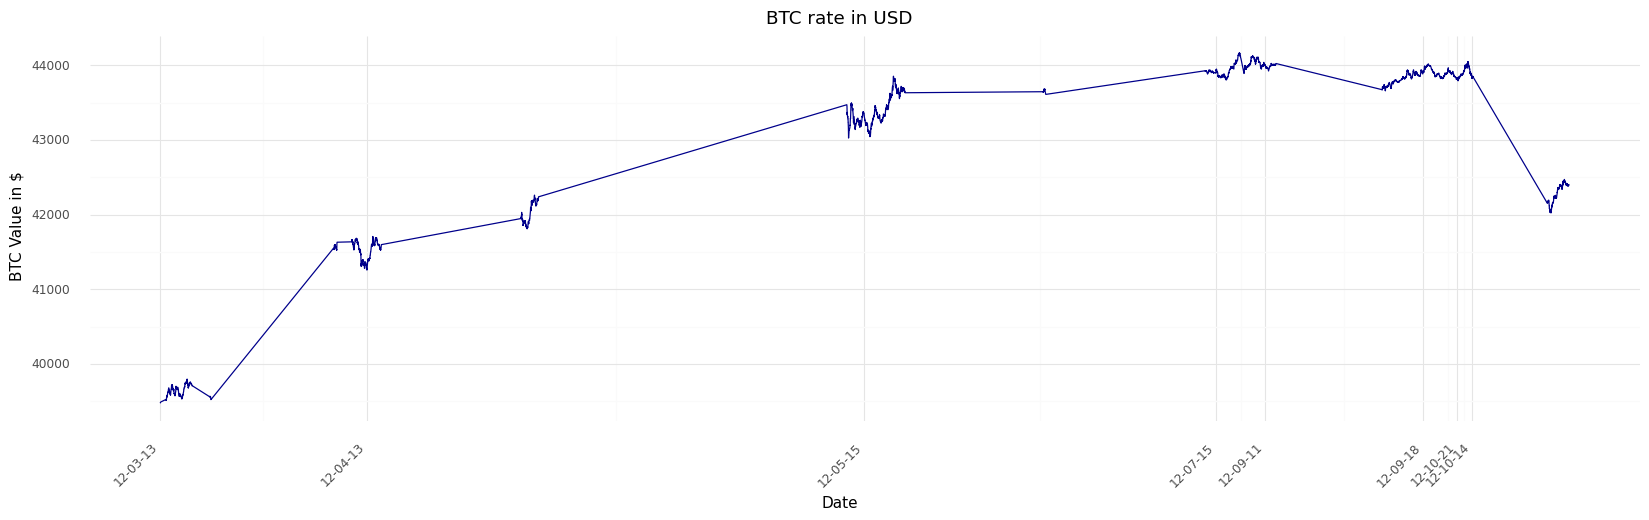

<ggplot: (156126290569)>

In [93]:
p9.options.figure_size = (20, 5)
btc_rates = crypto_rates[crypto_rates['symbol'] == 'BTC']
(
    ggplot(btc_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color = 'darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=btc_rates['timestamp'].unique()[::len(btc_rates['timestamp'].unique())//7], labels=btc_rates['date'].unique()[::len(btc_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='BTC rate in USD', x='Date', y='BTC Value in $')
)


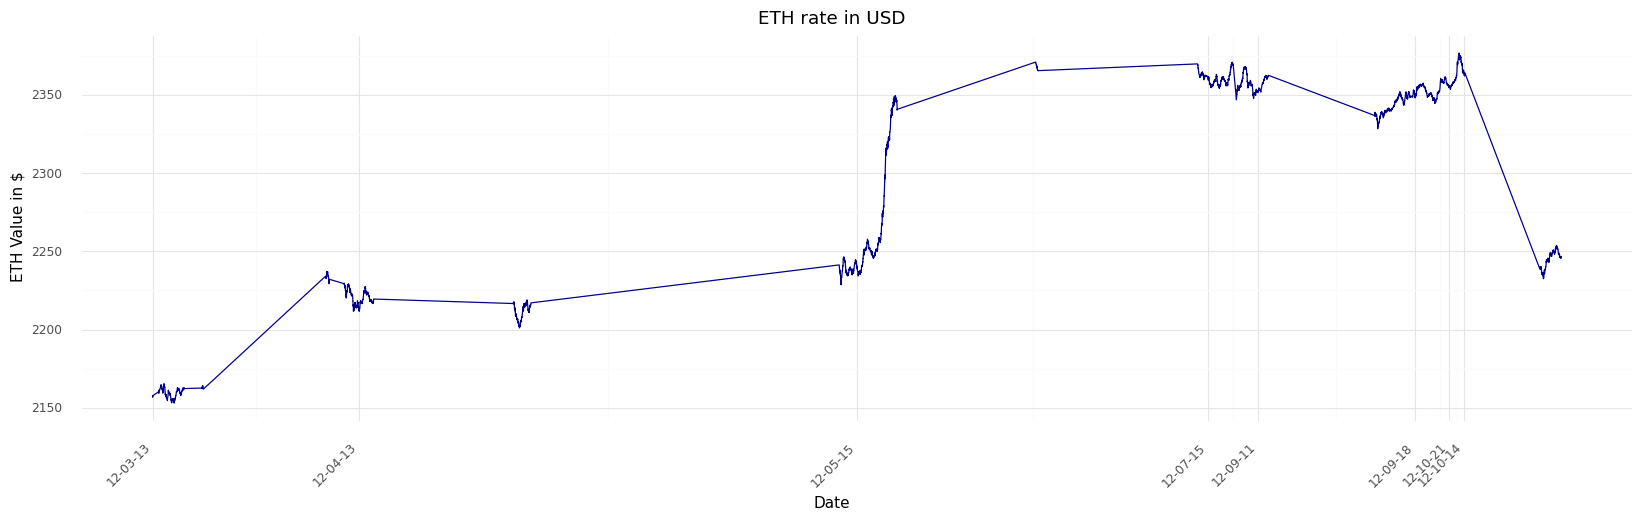

<ggplot: (156126282458)>

In [94]:
p9.options.figure_size = (20, 5)
eth_rates = crypto_rates[crypto_rates['symbol'] == 'ETH']
(
    ggplot(eth_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color = 'darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=eth_rates['timestamp'].unique()[::len(eth_rates['timestamp'].unique())//7], labels=eth_rates['date'].unique()[::len(eth_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='ETH rate in USD', x='Date', y='ETH Value in $')
)

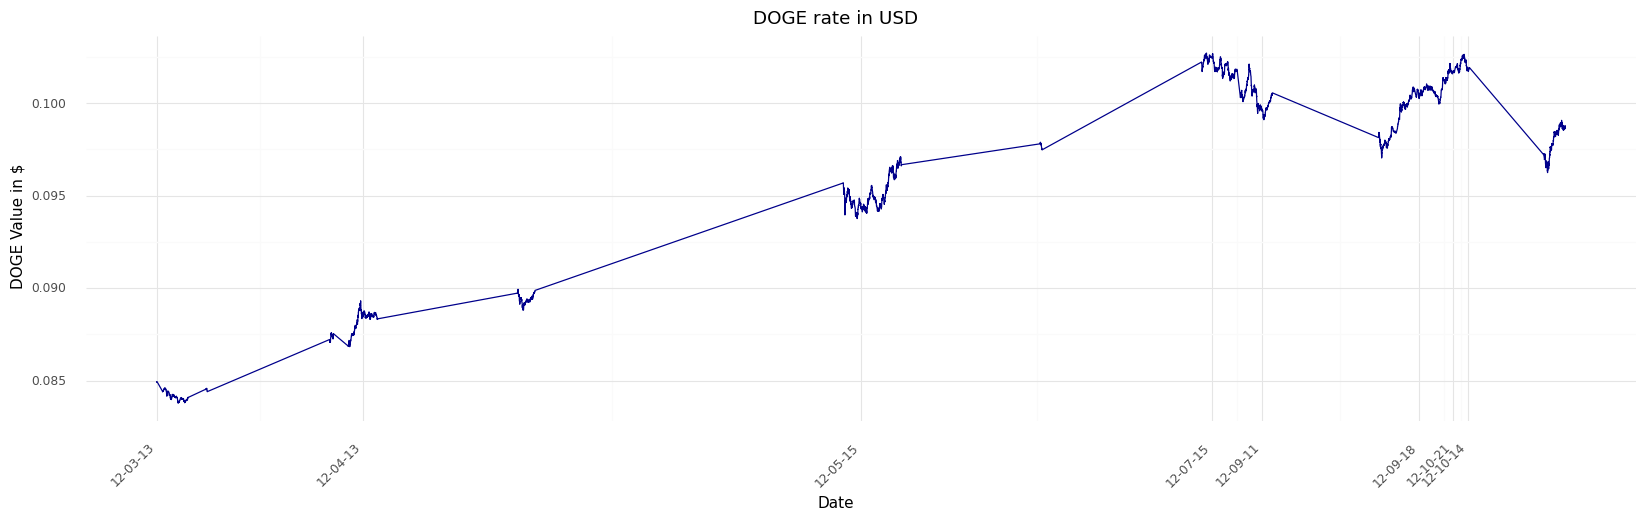

<ggplot: (156126317899)>

In [95]:
p9.options.figure_size = (20, 5)
doge_rates = crypto_rates[crypto_rates['symbol'] == 'DOGE']
(
    ggplot(doge_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color = 'darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=doge_rates['timestamp'].unique()[::len(doge_rates['timestamp'].unique())//7], labels=doge_rates['date'].unique()[::len(doge_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='DOGE rate in USD', x='Date', y='DOGE Value in $')
)

# News analysis

In [100]:
news_io.head()

,article_id,title,link,keywords,creator,video_url,description,content,timestamp,image_url,source_id,source_priority,country,category,language
0,aff9633c7b572ed6a39f6e12f9f989d5,Exchange Analysts Reveal Four Sources of Bitco...,https://en.bitcoinsistemi.com/exchange-analyst...,"[Analysis, Bitcoin, News]",[Mete Demiralp],"""""",Analysts from cryptocurrency exchange Bitfinex...,Analysts from cryptocurrency exchange Bitfinex...,1701936425000,https://en.bitcoinsistemi.com/wp-content/uploa...,bitcoinsistemi,7453936,[turkey],[top],english
1,b40084ed2dadc26f1dc4aa35c4ee3bcd,"Cold Supply Faces Challenges In Cost, Temperat...",https://www.businessworld.in/article/Cold-Supp...,"""""","""""","""""",Industry experts discuss the current state of ...,"""Transporting or supplying food is not that di...",1701936317000,https://static.businessworld.in/article/articl...,businessworld,150658,[india],[top],english
2,fbfd495a6cea7b42a7e59d89dfd4e623,Fidel Castro's Sister Who Worked For The CIA D...,https://www.ibtimes.co.uk/fidel-castros-sister...,[World],"""""","""""",Juanita Castro lived in exile in Miami for dec...,"""INTERNATIONAL BUSINESS TIMES uk NOTICEBOARD M...",1701935869000,"""""",ibtimes,458722,[united kingdom],[top],english
3,11fa582ca8e21615c43a04d935a1afe1,"Following UK expansion, Robinhood brings crypt...",https://techcrunch.com/2023/12/07/robinhood-eu...,"[Crypto, crypto, Robinhood]",[Rita Liao],"""""",Robinhood’s long-awaited international expansi...,Robinhood’s long-awaited international expansi...,1701935747000,"""""",techcrunch,1756,[united states of america],[technology],english
4,c0ff0bdc7891d86c43bb7505ea256d5e,The Future of Trading Has Arrived: Say Hello t...,https://news.knowledia.com/GB/en/articles/the-...,"""""","""""","""""",Article posted at The Market Oracle http://www...,"""The Future of Trading Has Arrived: Say Hello ...",1701935660000,http://www.marketoracle.co.uk/images/marketora...,knowledia,167779,[united kingdom],[top],english


## Missing data

In [98]:
news_io.isnull().sum()

article_id         0
title              0
link               0
keywords           0
creator            0
video_url          0
description        0
content            0
timestamp          0
image_url          0
source_id          0
source_priority    0
country            0
category           0
language           0
dtype: int64

In [122]:
empty_counts = news_io.eq('""').sum()
print(empty_counts)


article_id           0
title                0
link                 0
keywords           190
creator            202
video_url          508
description         19
content              0
timestamp            0
image_url          215
source_id            0
source_priority      0
country              0
category             0
language             0
dtype: int64


## Languages

In [113]:
news_io['language'].value_counts()


language
english    508
Name: count, dtype: int64

In [101]:
len(news_io['language'])

508

## Crypto currenices mentions

In [106]:
bitcoin_mentions = news_io[news_io['content'].str.contains('Bitcoin', case=False) | news_io['title'].str.contains('Bitcoin', case=False)]
len(bitcoin_mentions)


192

In [164]:
bitcoin_mentions['sentiment'] = bitcoin_mentions['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
bitcoin_mentions['sentiment_label'] = bitcoin_mentions['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
bitcoin_mentions = bitcoin_mentions[bitcoin_mentions['sentiment_label'] != 'neutral']
bitcoin_mentions['sentiment_label'].value_counts()


sentiment_label
positive    177
negative     13
Name: count, dtype: int64

In [107]:
eth_mentions = news_io[news_io['content'].str.contains('Ethereum', case=False) | news_io['title'].str.contains('Ethereum', case=False)]
len(eth_mentions)

63

In [145]:
eth_mentions['sentiment'] = eth_mentions['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
eth_mentions['sentiment_label'] = eth_mentions['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
eth_mentions = eth_mentions[eth_mentions['sentiment_label'] != 'neutral']
eth_mentions['sentiment_label'].value_counts()


sentiment_label
positive    59
negative     4
Name: count, dtype: int64

In [108]:
doge_mentions = news_io[news_io['content'].str.contains('Doge', case=False) | news_io['title'].str.contains('Doge', case=False)]
len(doge_mentions)

16

In [146]:
doge_mentions['sentiment'] = doge_mentions['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
doge_mentions['sentiment_label'] = doge_mentions['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
doge_mentions = doge_mentions[doge_mentions['sentiment_label'] != 'neutral']
doge_mentions['sentiment_label'].value_counts()


sentiment_label
positive    15
negative     1
Name: count, dtype: int64

# Combined analysis

c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


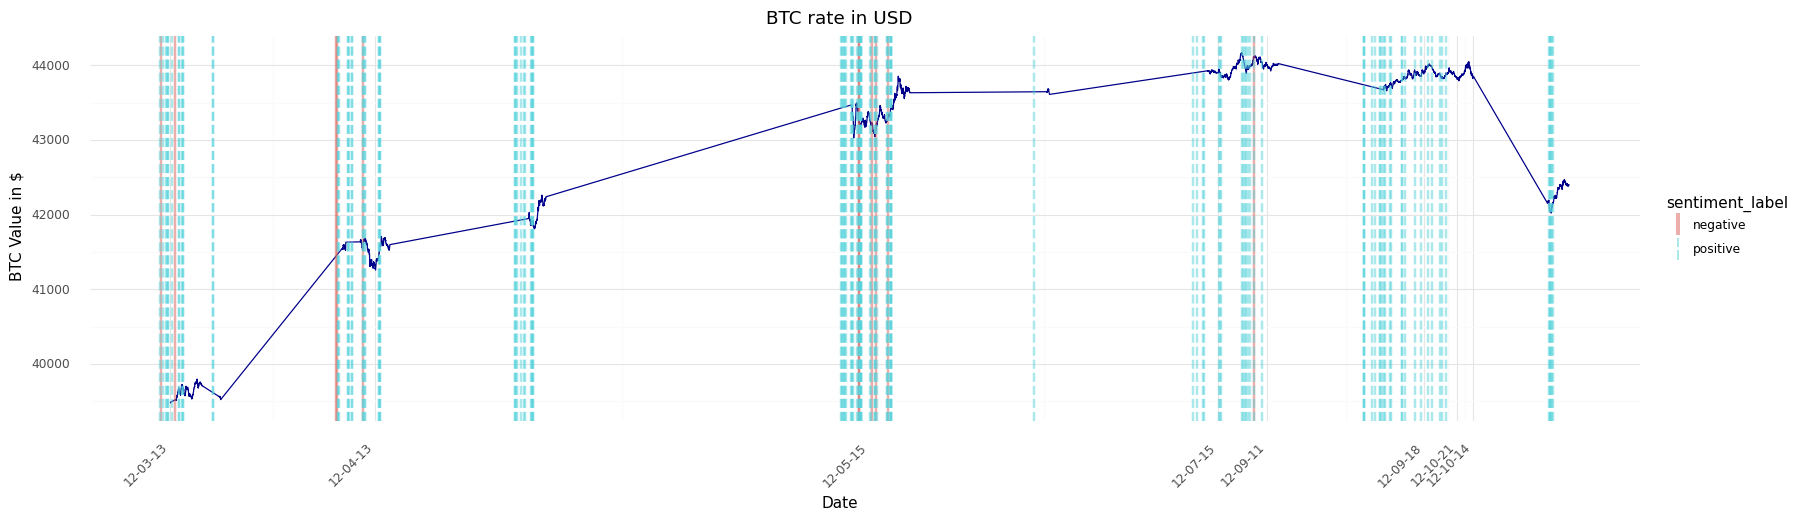

<ggplot: (156144681549)>

In [165]:
# Get the timestamps from bitcoin_mentions
bitcoin_timestamps = bitcoin_mentions['timestamp'].unique()

# Add vertical lines to the plot
plot_with_lines = (
    ggplot(btc_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color='darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=btc_rates['timestamp'].unique()[::len(btc_rates['timestamp'].unique())//7], labels=btc_rates['date'].unique()[::len(btc_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='BTC rate in USD', x='Date', y='BTC Value in $') +
    geom_vline(data=bitcoin_mentions, mapping=aes(xintercept='timestamp', color='sentiment_label', linetype='sentiment_label'), alpha=0.5, size = 1)
)

plot_with_lines


c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


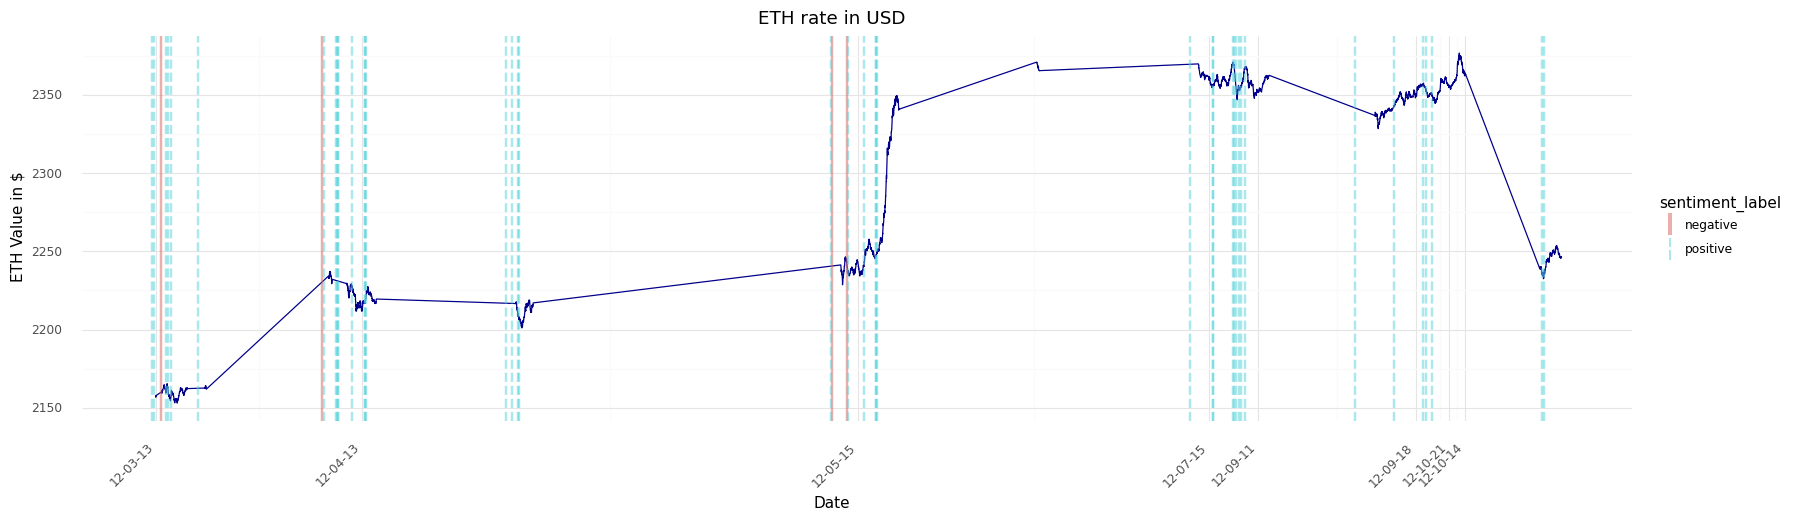

<ggplot: (156145305411)>

In [159]:
# Get the timestamps from bitcoin_mentions
eth_timestamps = eth_mentions['timestamp'].unique()

# Add vertical lines to the plot
plot_with_lines = (
    ggplot(eth_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color='darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=eth_rates['timestamp'].unique()[::len(eth_rates['timestamp'].unique())//7], labels=eth_rates['date'].unique()[::len(eth_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='ETH rate in USD', x='Date', y='ETH Value in $') +
    geom_vline(data=eth_mentions, mapping=aes(xintercept='timestamp', color='sentiment_label', linetype='sentiment_label'), alpha=0.5, size = 1)
)

plot_with_lines


c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Hubert\AppData\Local\Programs\Python\Python310\lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


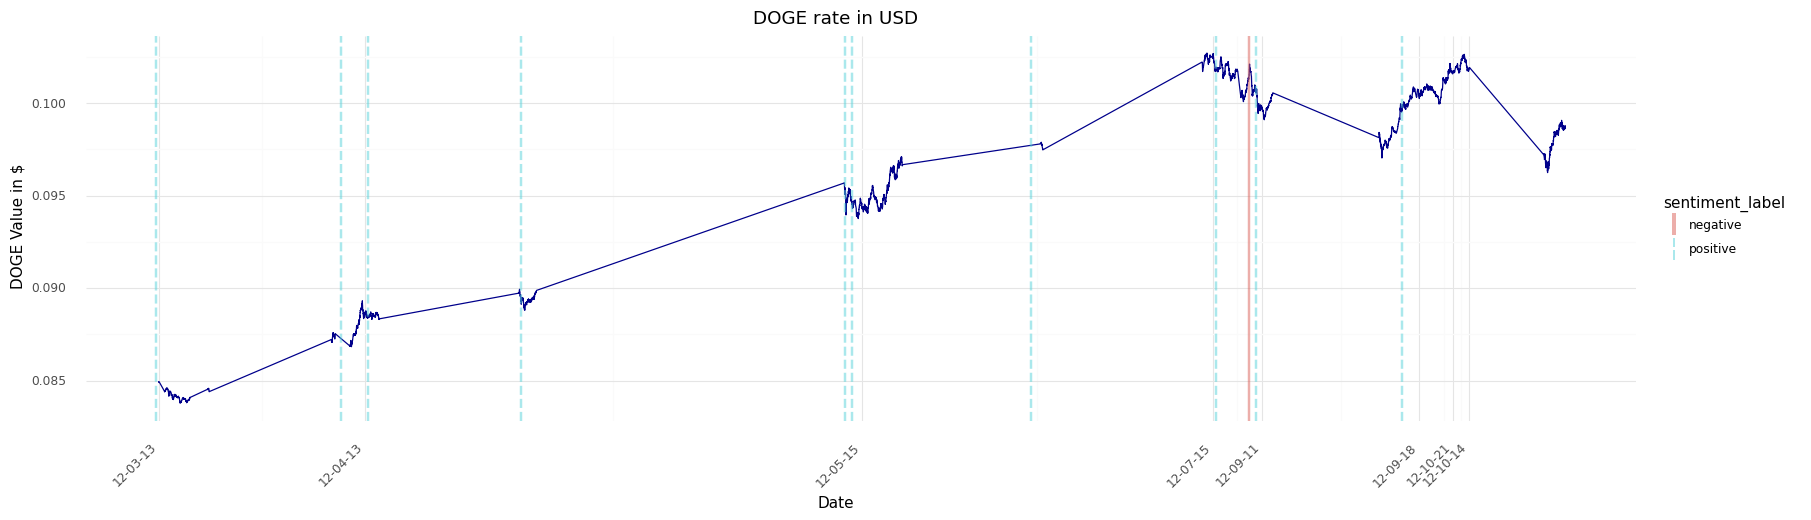

<ggplot: (156145336699)>

In [167]:
# Get the timestamps from bitcoin_mentions
doge_timestamps = doge_mentions['timestamp'].unique()

# Add vertical lines to the plot
plot_with_lines = (
    ggplot(doge_rates) +
    aes(x='timestamp', y='rateUsd') +
    geom_line(color='darkblue') +
    theme_minimal() +
    scale_x_continuous(breaks=doge_rates['timestamp'].unique()[::len(doge_rates['timestamp'].unique())//7], labels=doge_rates['date'].unique()[::len(doge_rates['date'].unique())//7]) +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    labs(title='DOGE rate in USD', x='Date', y='DOGE Value in $') +
    geom_vline(data=doge_mentions, mapping=aes(xintercept='timestamp', color='sentiment_label', linetype='sentiment_label'), alpha=0.5, size = 1)
)

plot_with_lines
